In [52]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [13]:
cwd = os.getcwd()
root_dir = os.path.dirname(cwd)

In [14]:
data = pd.read_csv(root_dir + "/data/raw/Loan_defaults/Loan_default.csv")

In [20]:
categorical = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

for cat in categorical:
    data[cat] = pd.Categorical(data[cat], categories=list(set(data[cat])))

In [21]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [22]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


C:\Users\pgsva\AppData\Local\Temp\ipykernel_13472\4021941725.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), ax = ax)


<AxesSubplot: >

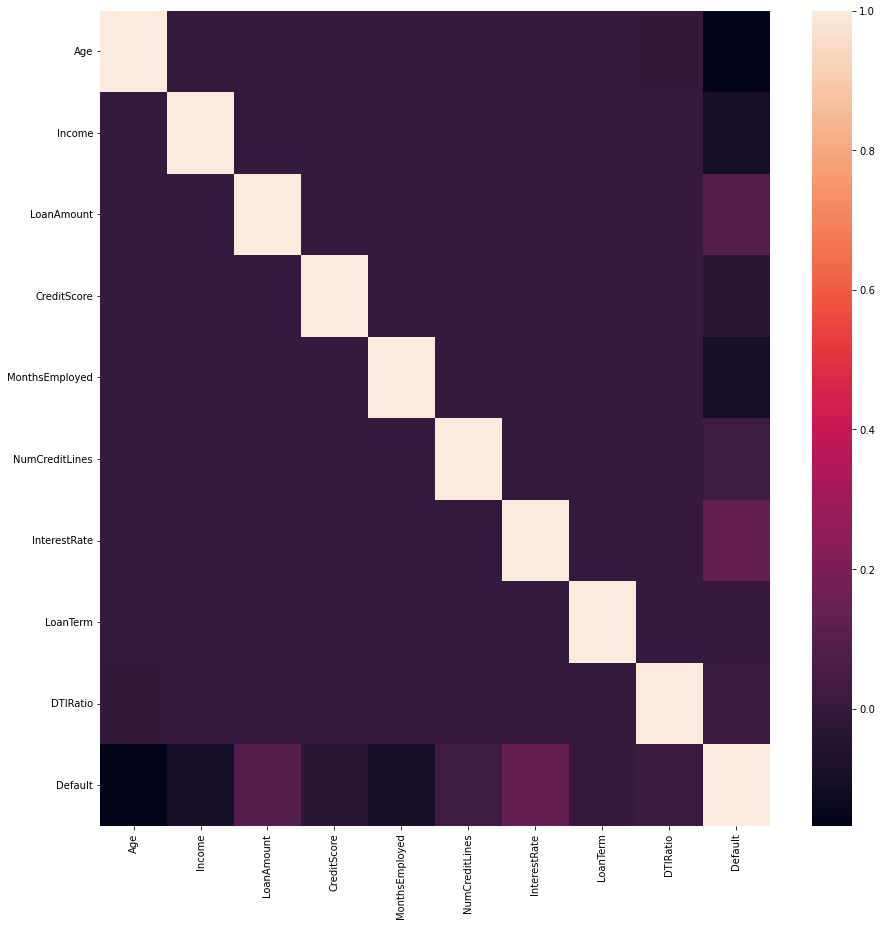

In [26]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), ax = ax)

In [44]:
cols = 0

for cat in categorical:
    cols = max(cols, data[cat].nunique())
    

In [45]:
cols

5

C:\Users\pgsva\AppData\Local\Temp\ipykernel_13472\641755298.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[data[cat] == sub_cat].corr(), ax = axs[i,j])


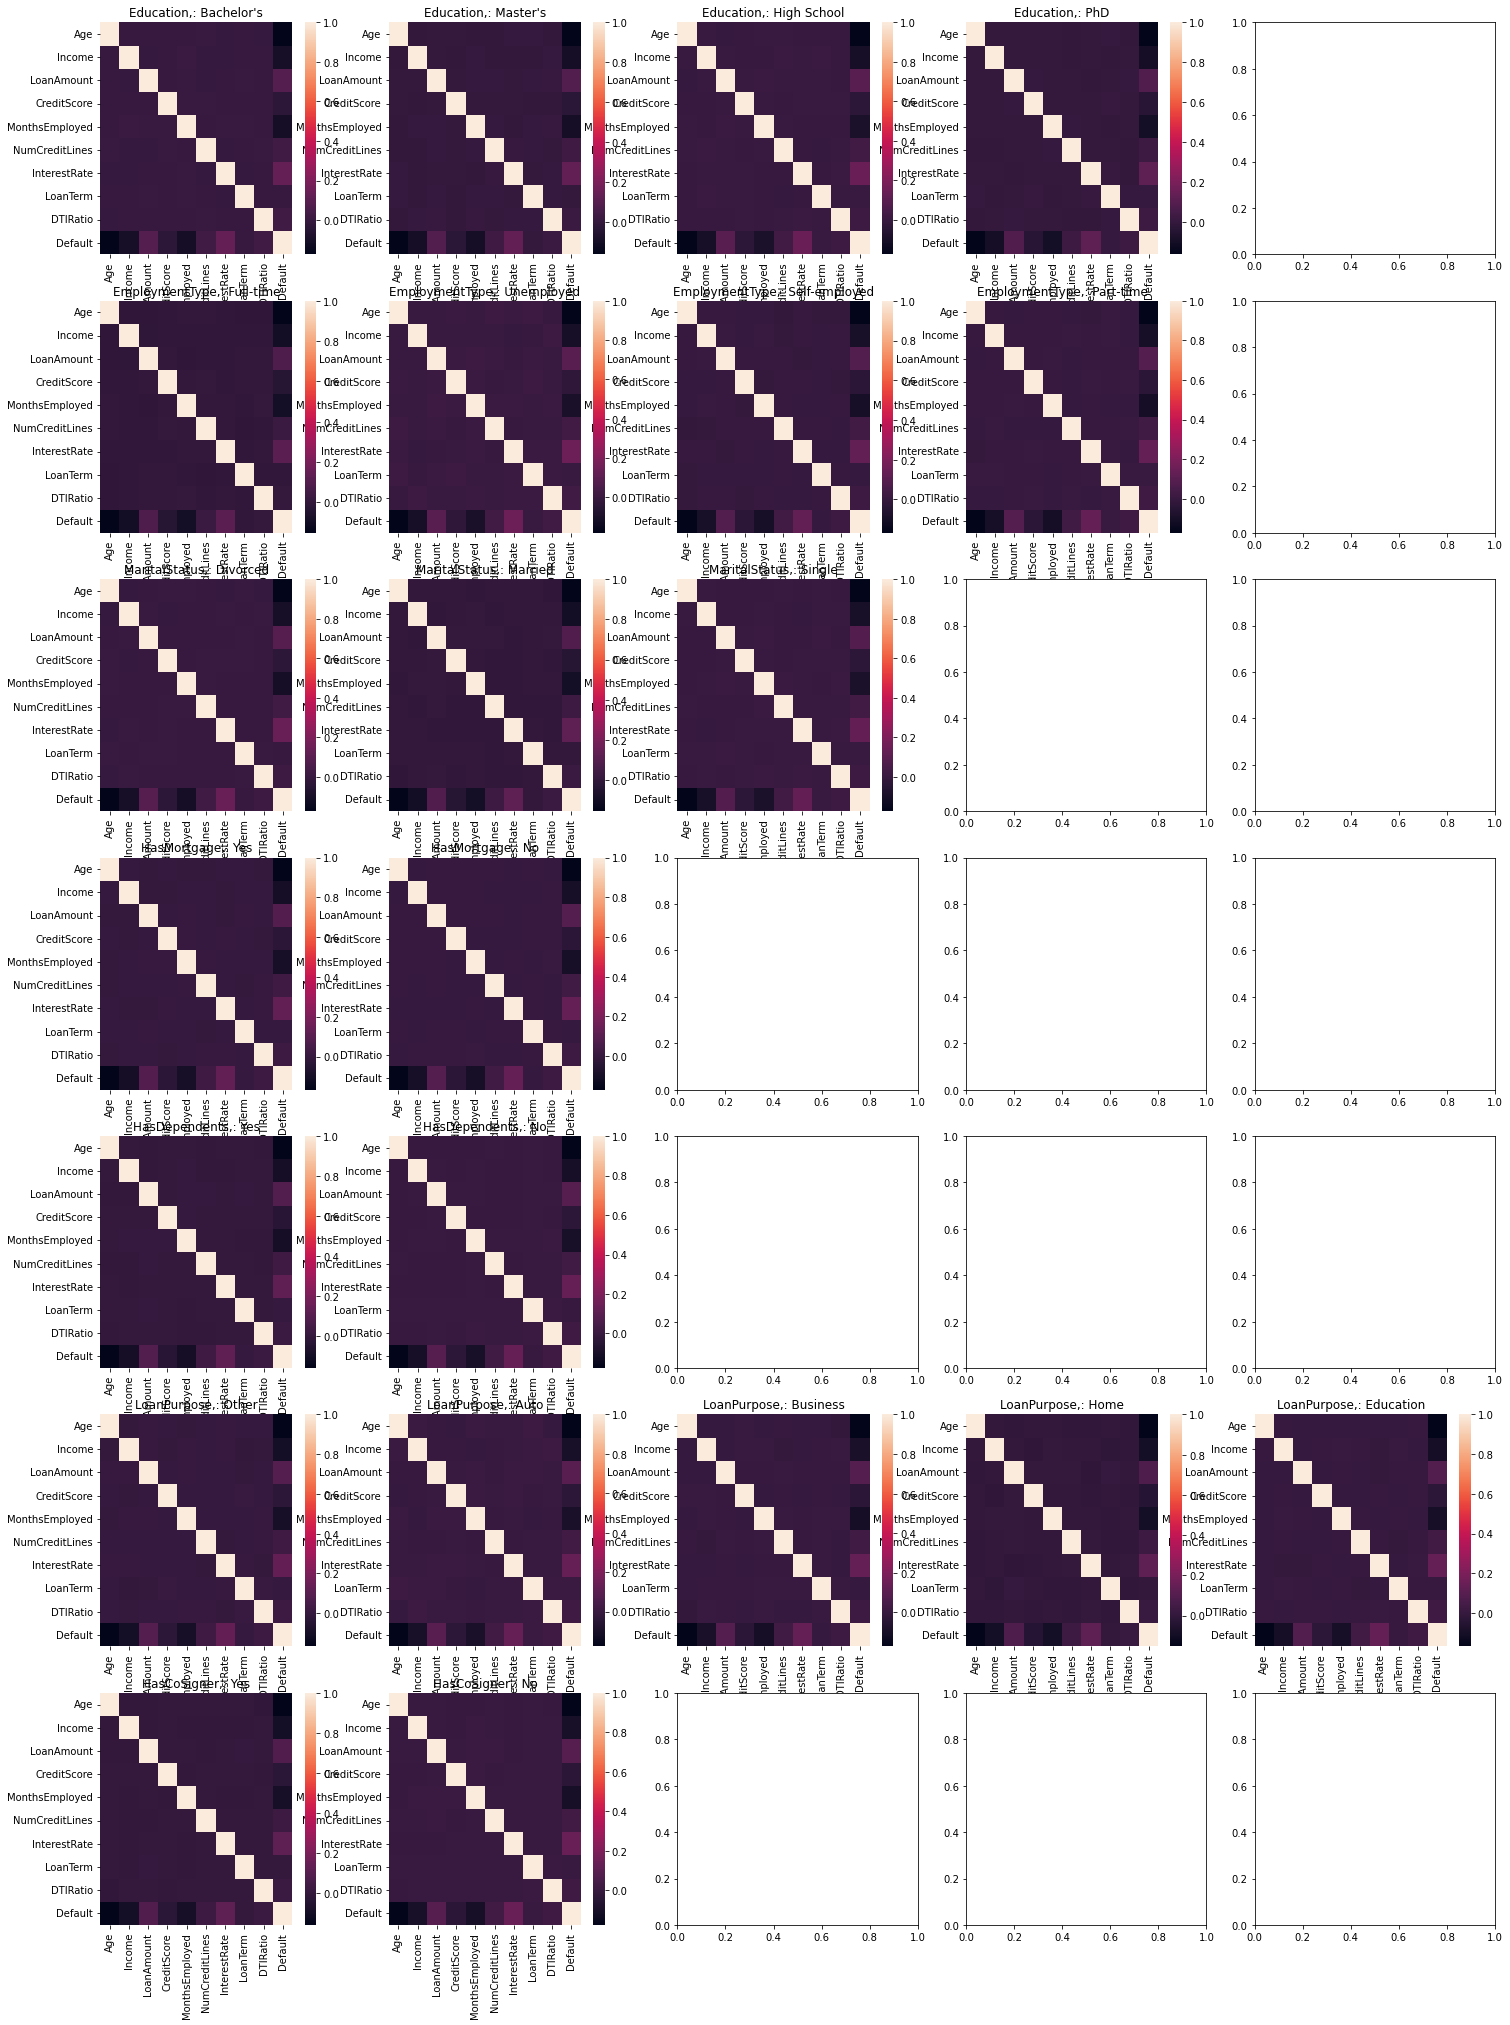

In [46]:
fig, axs = plt.subplots(nrows=7, ncols=cols, figsize=(cols*5, 35))
i = 0
for cat in categorical:
    j = 0
    for sub_cat in data[cat].unique():
        sns.heatmap(data[data[cat] == sub_cat].corr(), ax = axs[i,j])
        axs[i,j].set_title(cat + f",: {sub_cat}")
        j += 1
    i += 1
plt.show()

C:\Users\pgsva\AppData\Local\Temp\ipykernel_13472\1736317669.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[(data[cat] == sub_cat) & (data["Default"] == 1)].corr(), ax = axs[i,j])


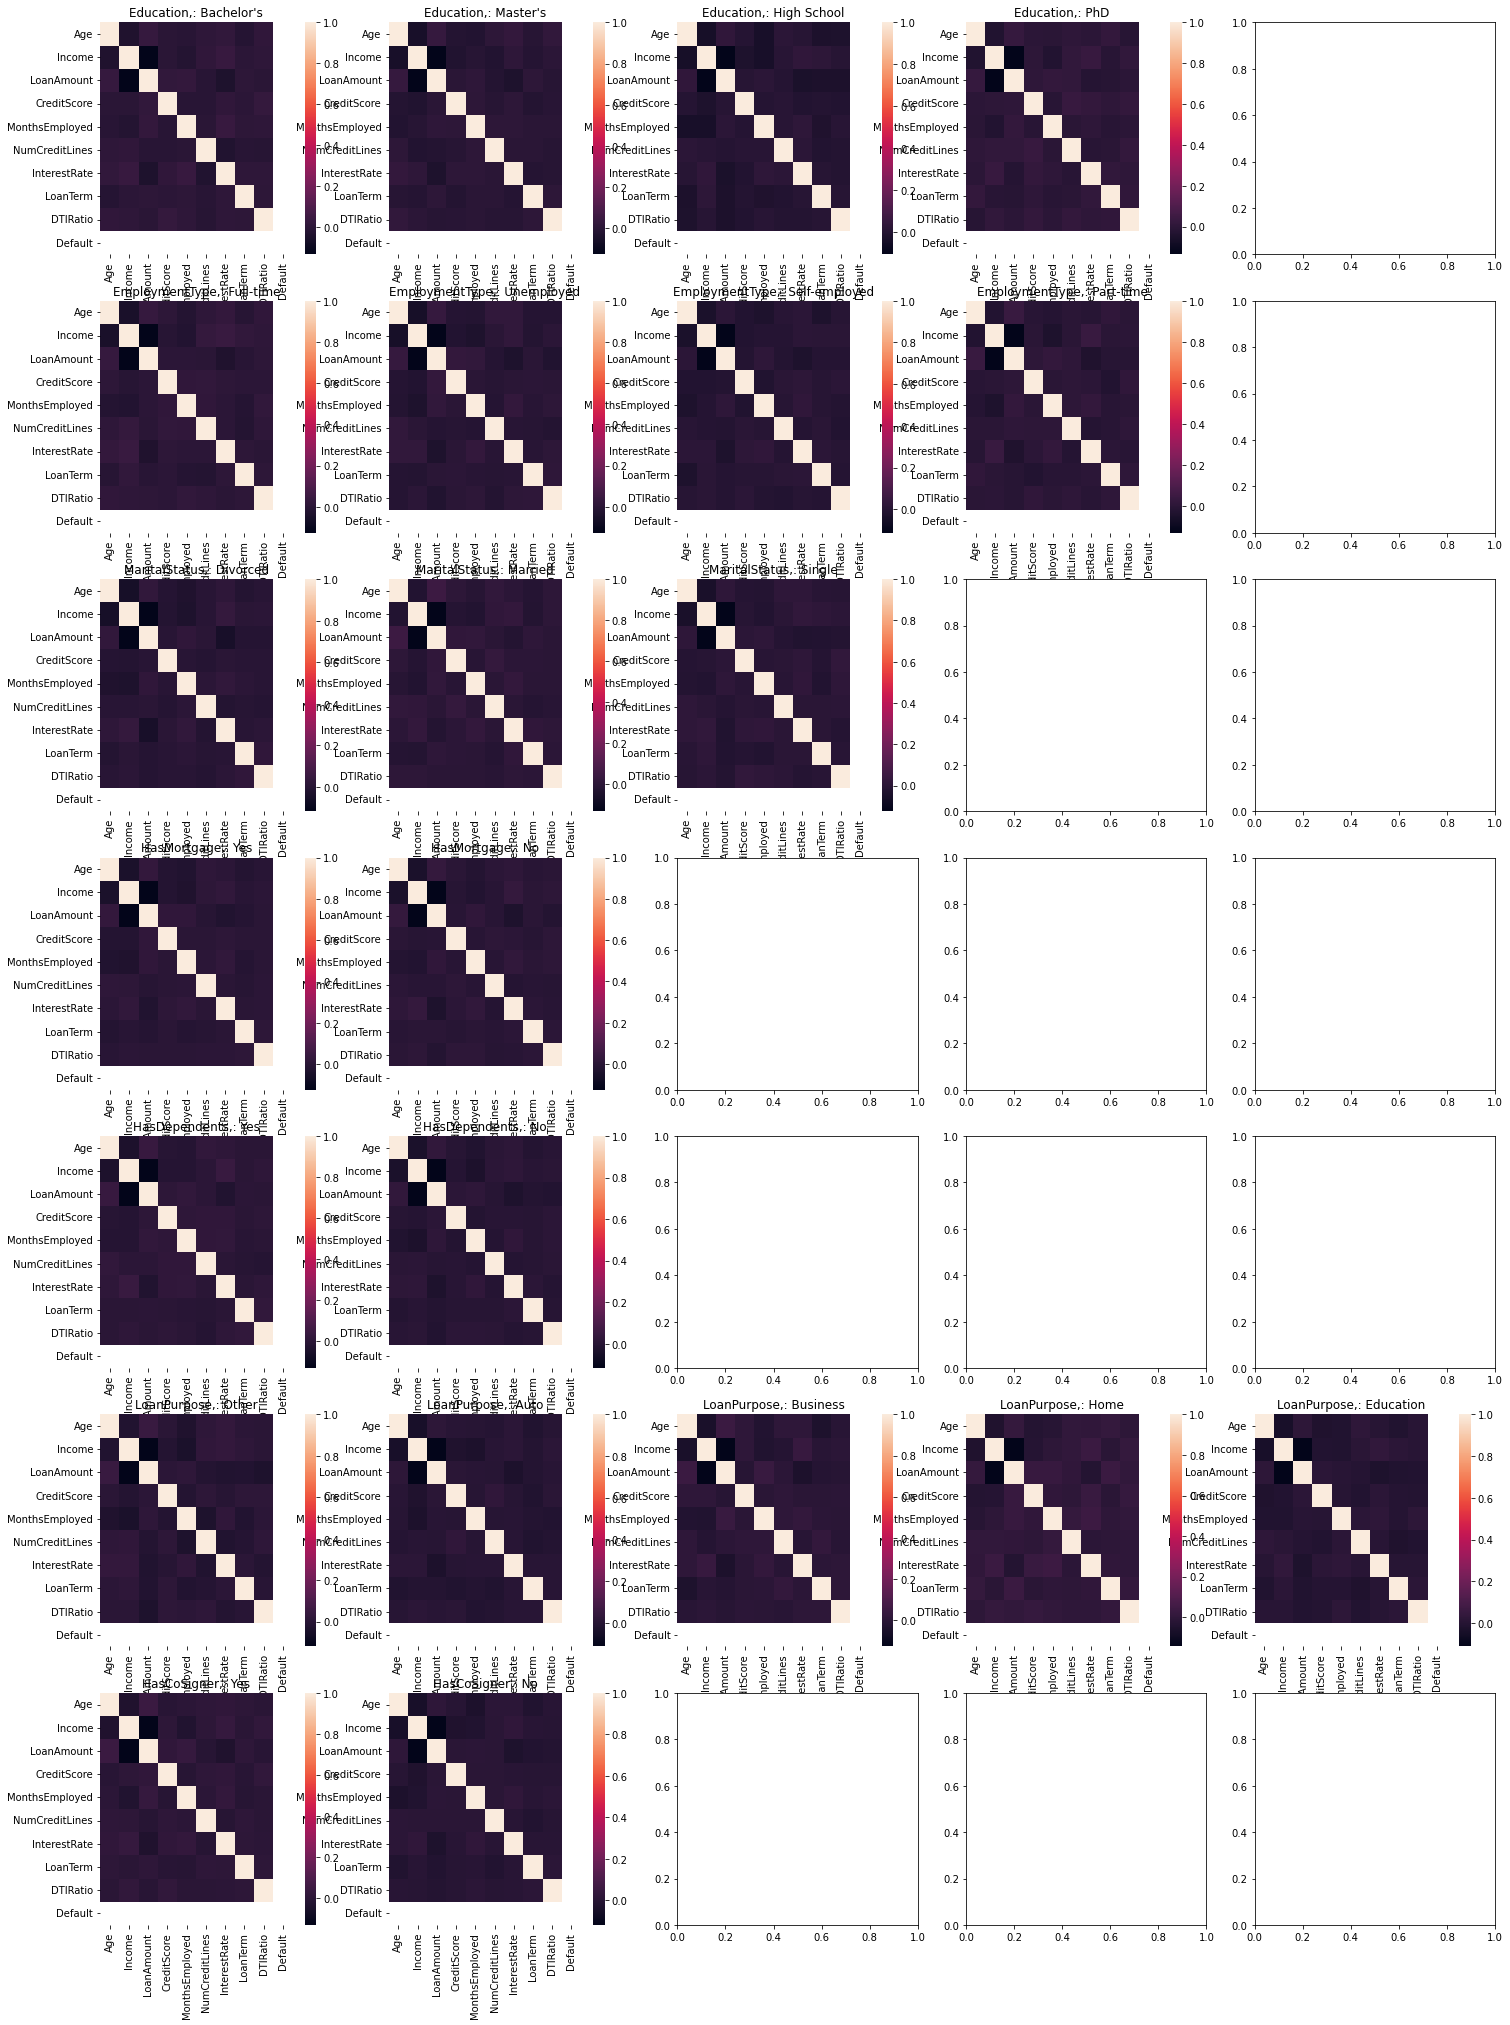

In [48]:
fig, axs = plt.subplots(nrows=7, ncols=cols, figsize=(cols*5, 35))
i = 0
for cat in categorical:
    j = 0
    for sub_cat in data[cat].unique():
        sns.heatmap(data[(data[cat] == sub_cat) & (data["Default"] == 1)].corr(), ax = axs[i,j])
        axs[i,j].set_title(cat + f",: {sub_cat}")
        j += 1
    i += 1
plt.show()

C:\Users\pgsva\AppData\Local\Temp\ipykernel_13472\772179625.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[(data[cat] == sub_cat) & (data["Default"] == 0)].corr(), ax = axs[i,j])


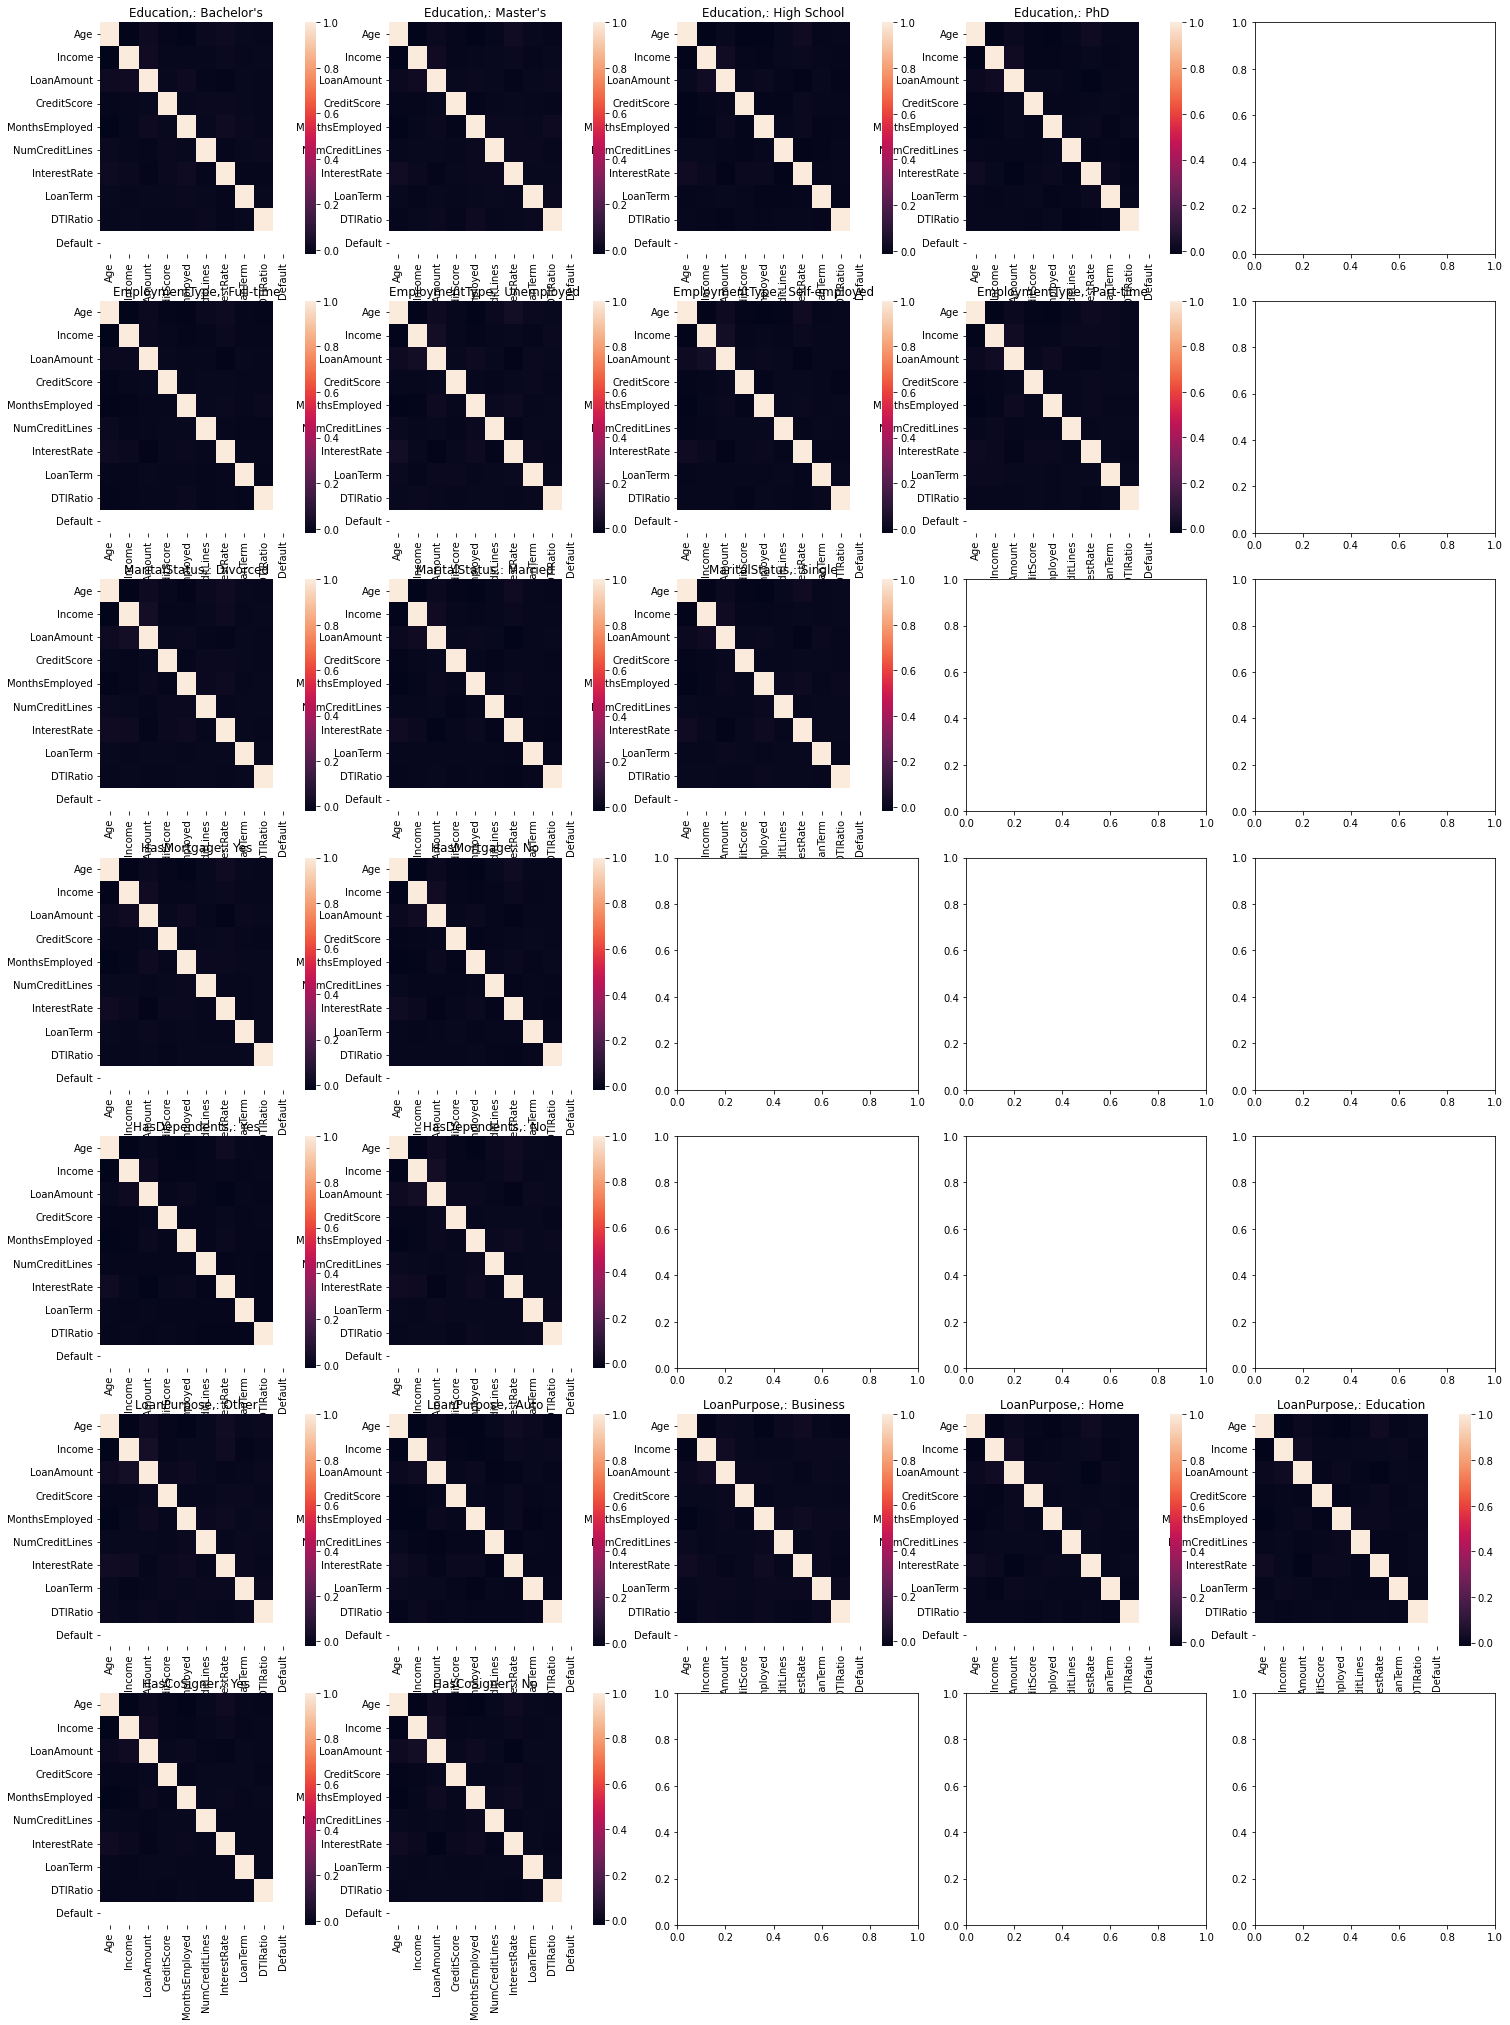

In [49]:
fig, axs = plt.subplots(nrows=7, ncols=cols, figsize=(cols*5, 35))
i = 0
for cat in categorical:
    j = 0
    for sub_cat in data[cat].unique():
        sns.heatmap(data[(data[cat] == sub_cat) & (data["Default"] == 0)].corr(), ax = axs[i,j])
        axs[i,j].set_title(cat + f",: {sub_cat}")
        j += 1
    i += 1
plt.show()

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'LoanAmount'}>],
       [<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'MonthsEmployed'}>,
        <AxesSubplot: title={'center': 'NumCreditLines'}>],
       [<AxesSubplot: title={'center': 'InterestRate'}>,
        <AxesSubplot: title={'center': 'LoanTerm'}>,
        <AxesSubplot: title={'center': 'DTIRatio'}>],
       [<AxesSubplot: title={'center': 'Default'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

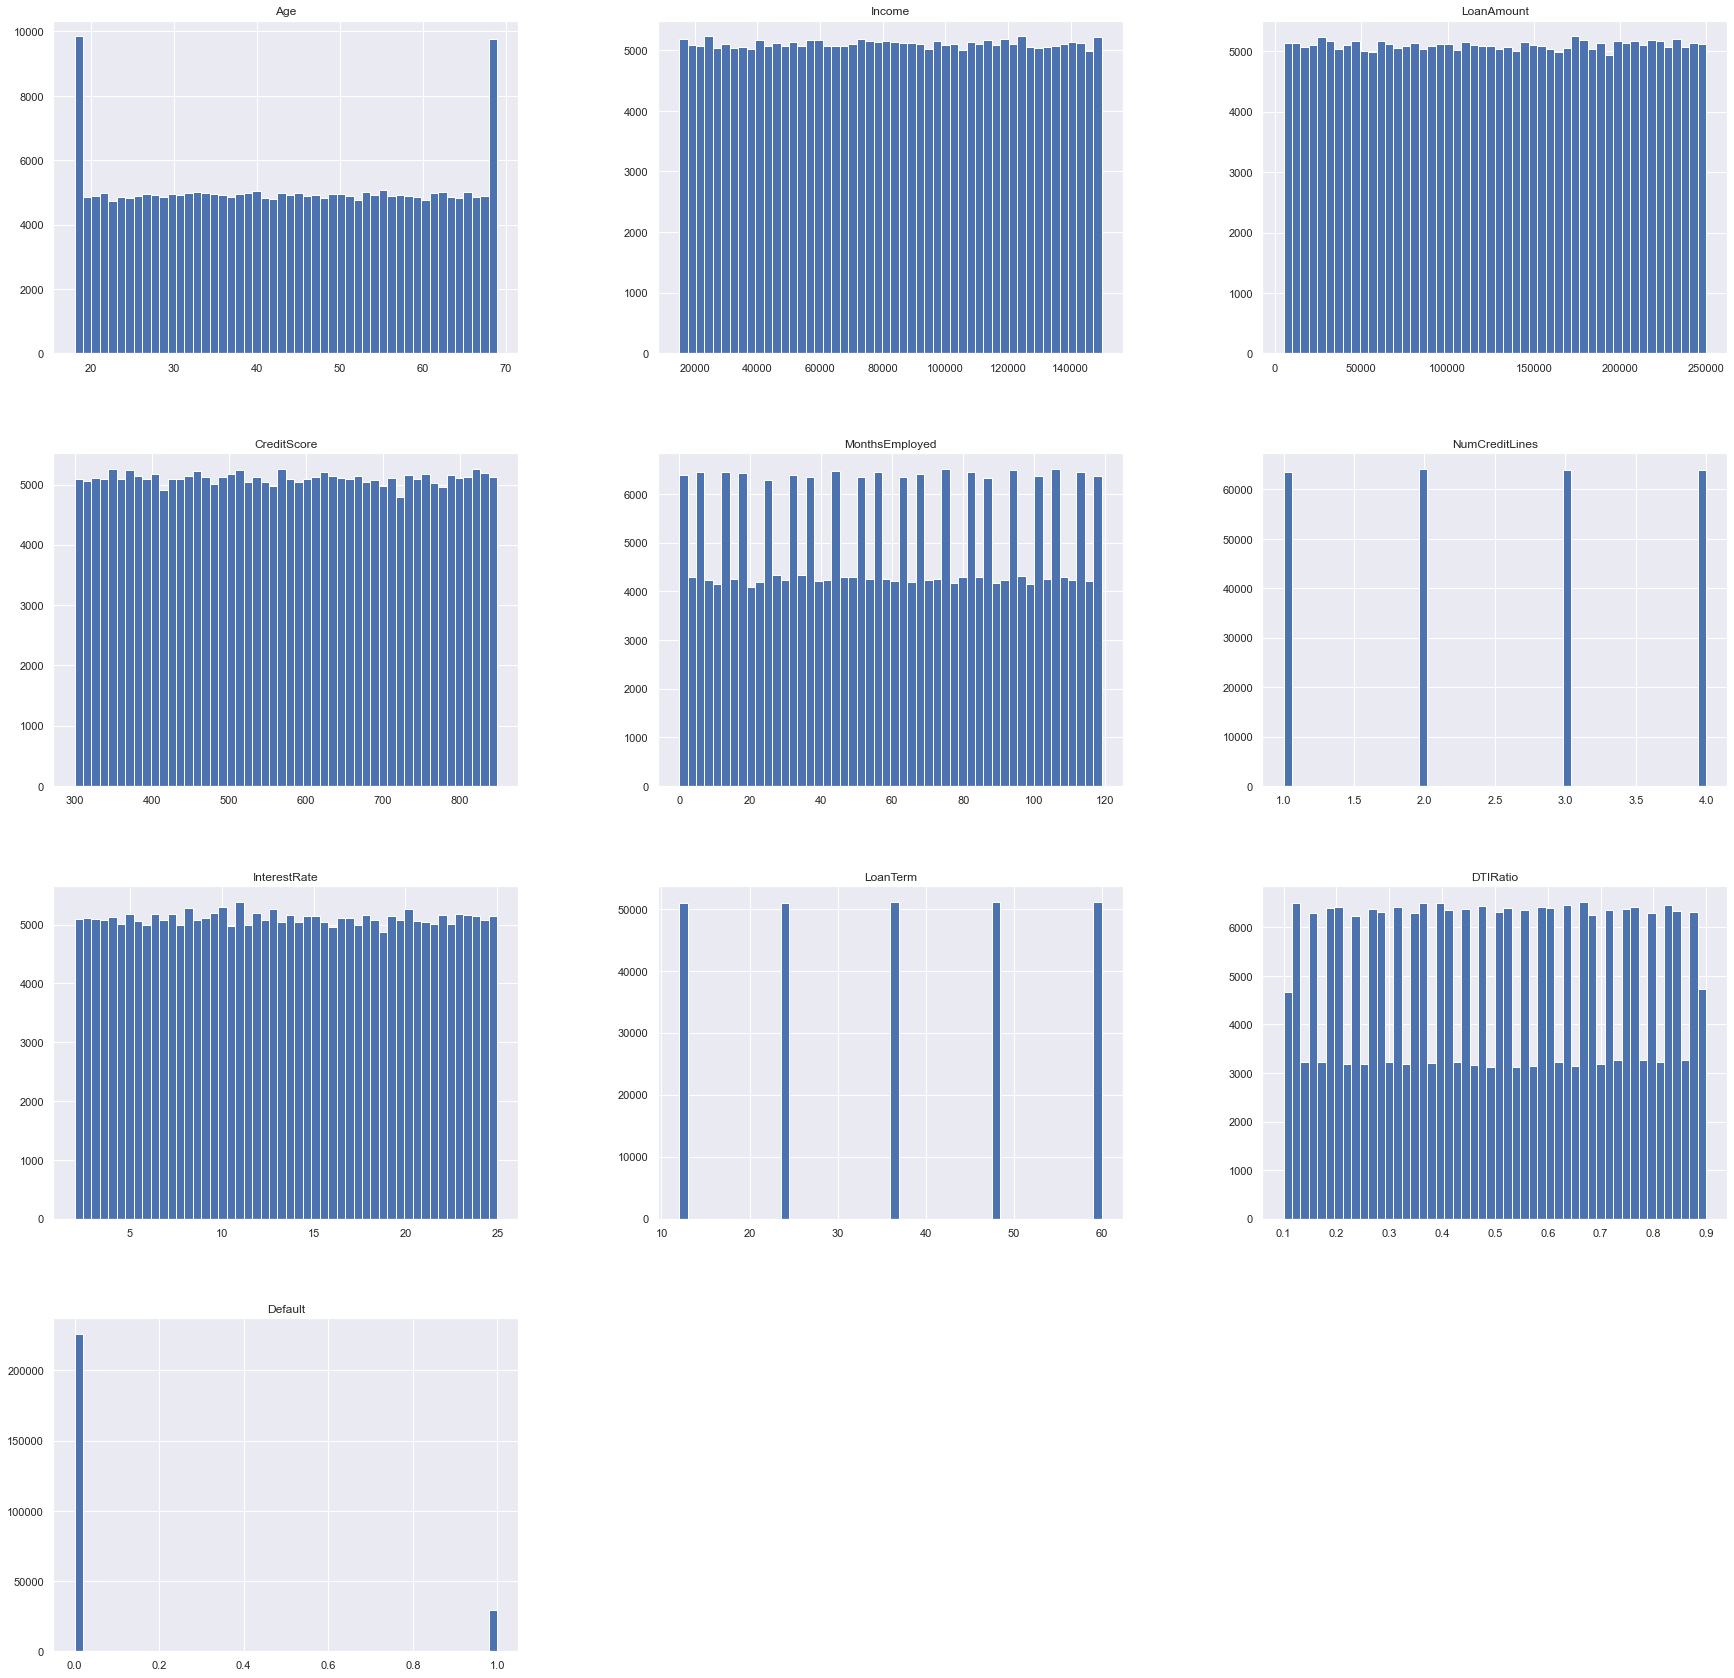

In [53]:
data.hist(bins=50, figsize=(30,30))

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'LoanAmount'}>],
       [<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'MonthsEmployed'}>,
        <AxesSubplot: title={'center': 'NumCreditLines'}>],
       [<AxesSubplot: title={'center': 'InterestRate'}>,
        <AxesSubplot: title={'center': 'LoanTerm'}>,
        <AxesSubplot: title={'center': 'DTIRatio'}>],
       [<AxesSubplot: title={'center': 'Default'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

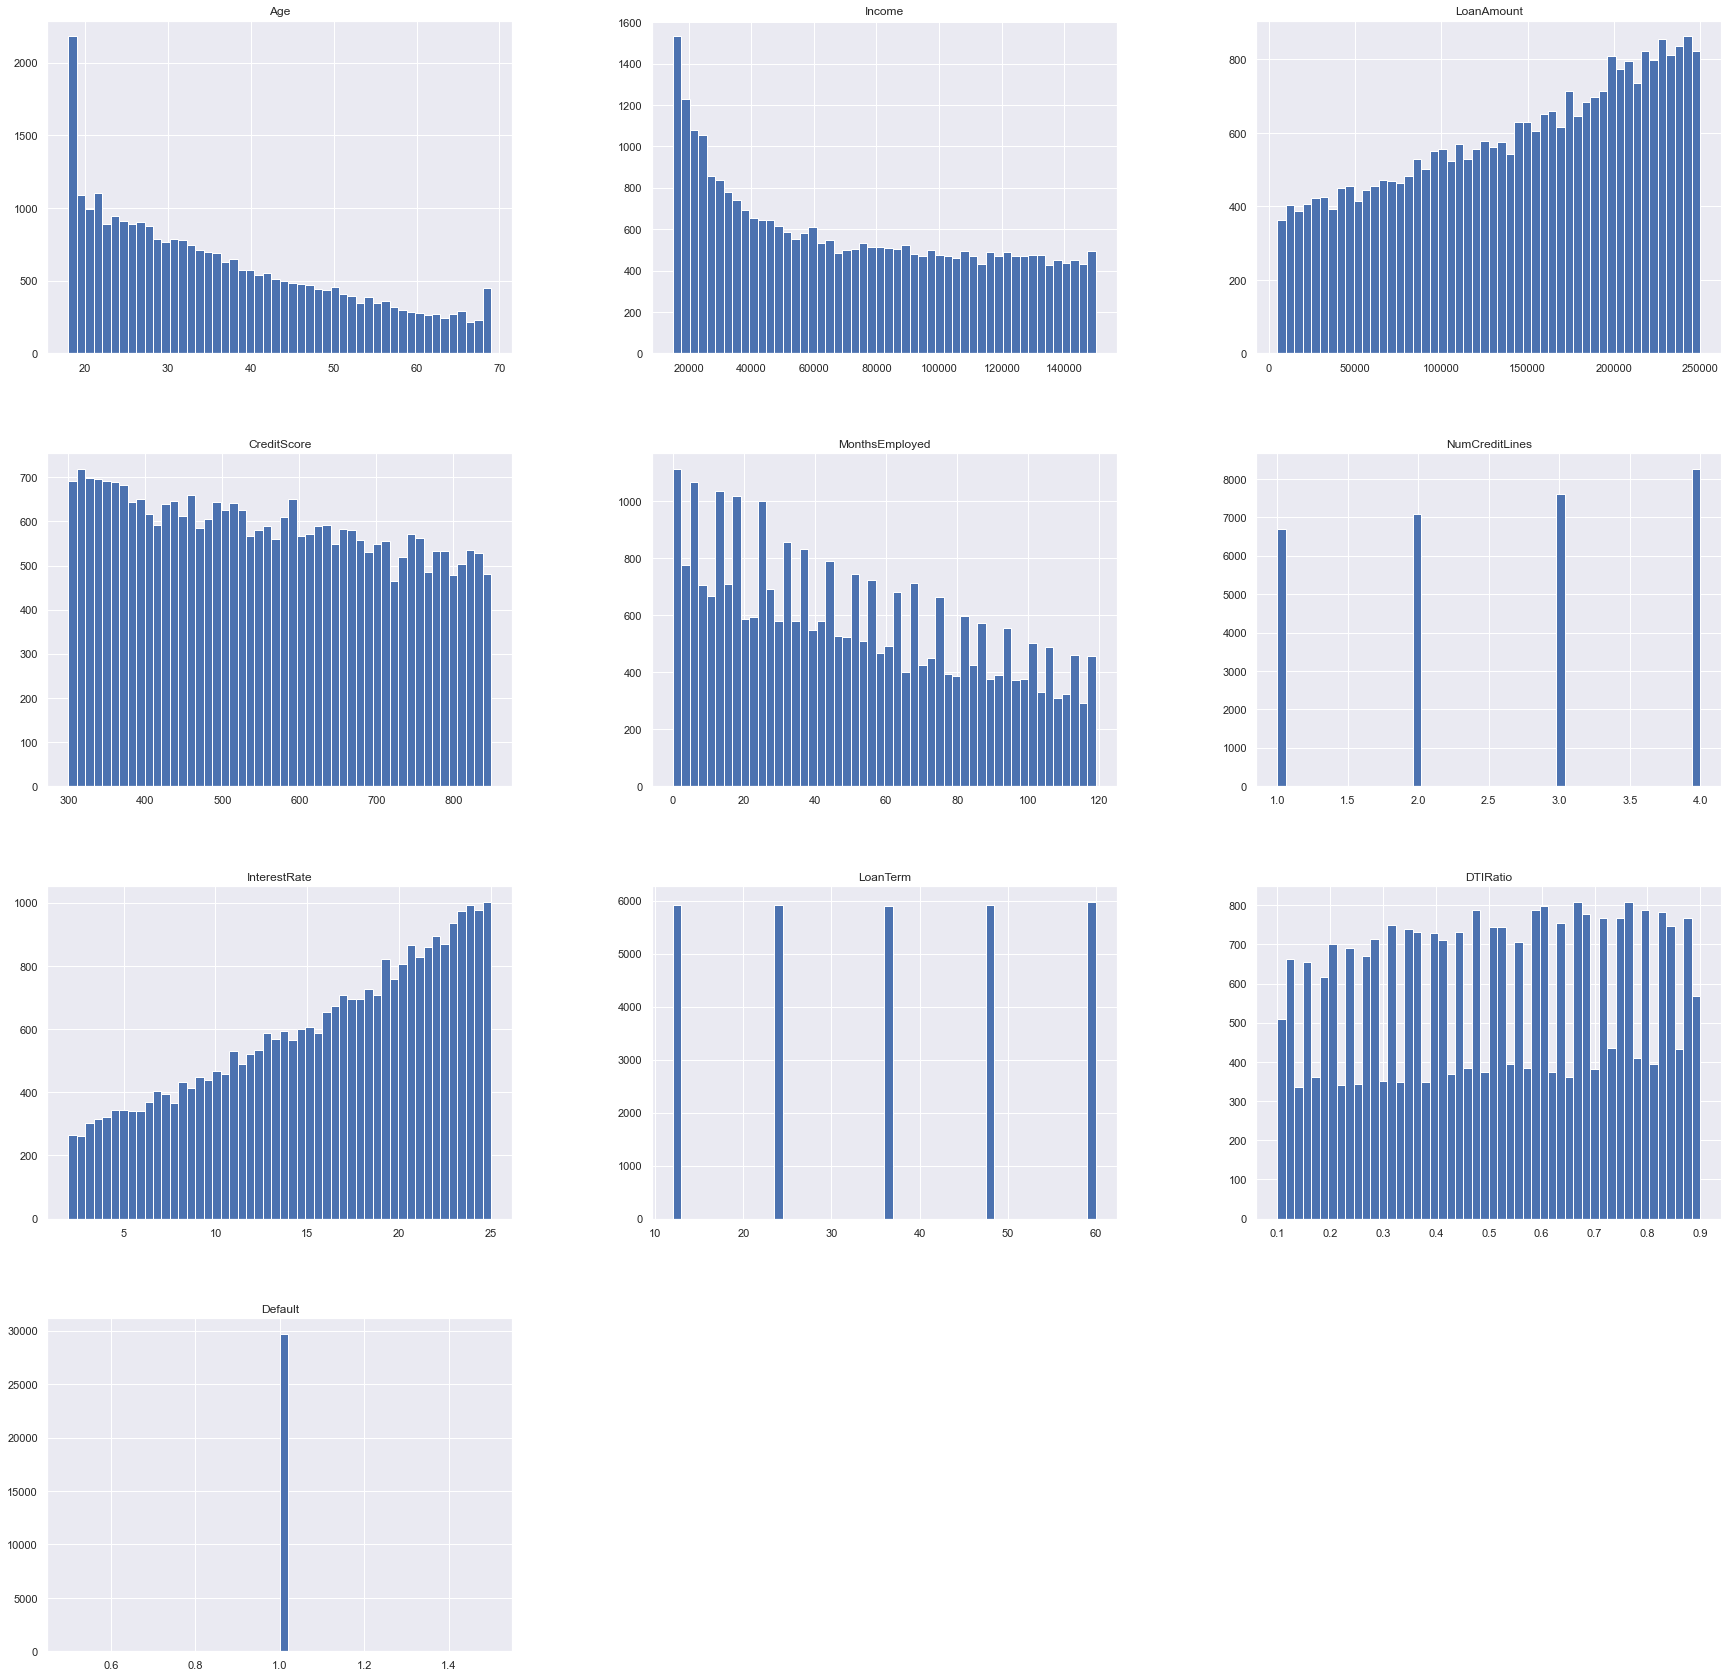

In [54]:
data[data['Default'] == 1].hist(bins=50, figsize=(30,30))

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>,
        <AxesSubplot: title={'center': 'LoanAmount'}>],
       [<AxesSubplot: title={'center': 'CreditScore'}>,
        <AxesSubplot: title={'center': 'MonthsEmployed'}>,
        <AxesSubplot: title={'center': 'NumCreditLines'}>],
       [<AxesSubplot: title={'center': 'InterestRate'}>,
        <AxesSubplot: title={'center': 'LoanTerm'}>,
        <AxesSubplot: title={'center': 'DTIRatio'}>],
       [<AxesSubplot: title={'center': 'Default'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

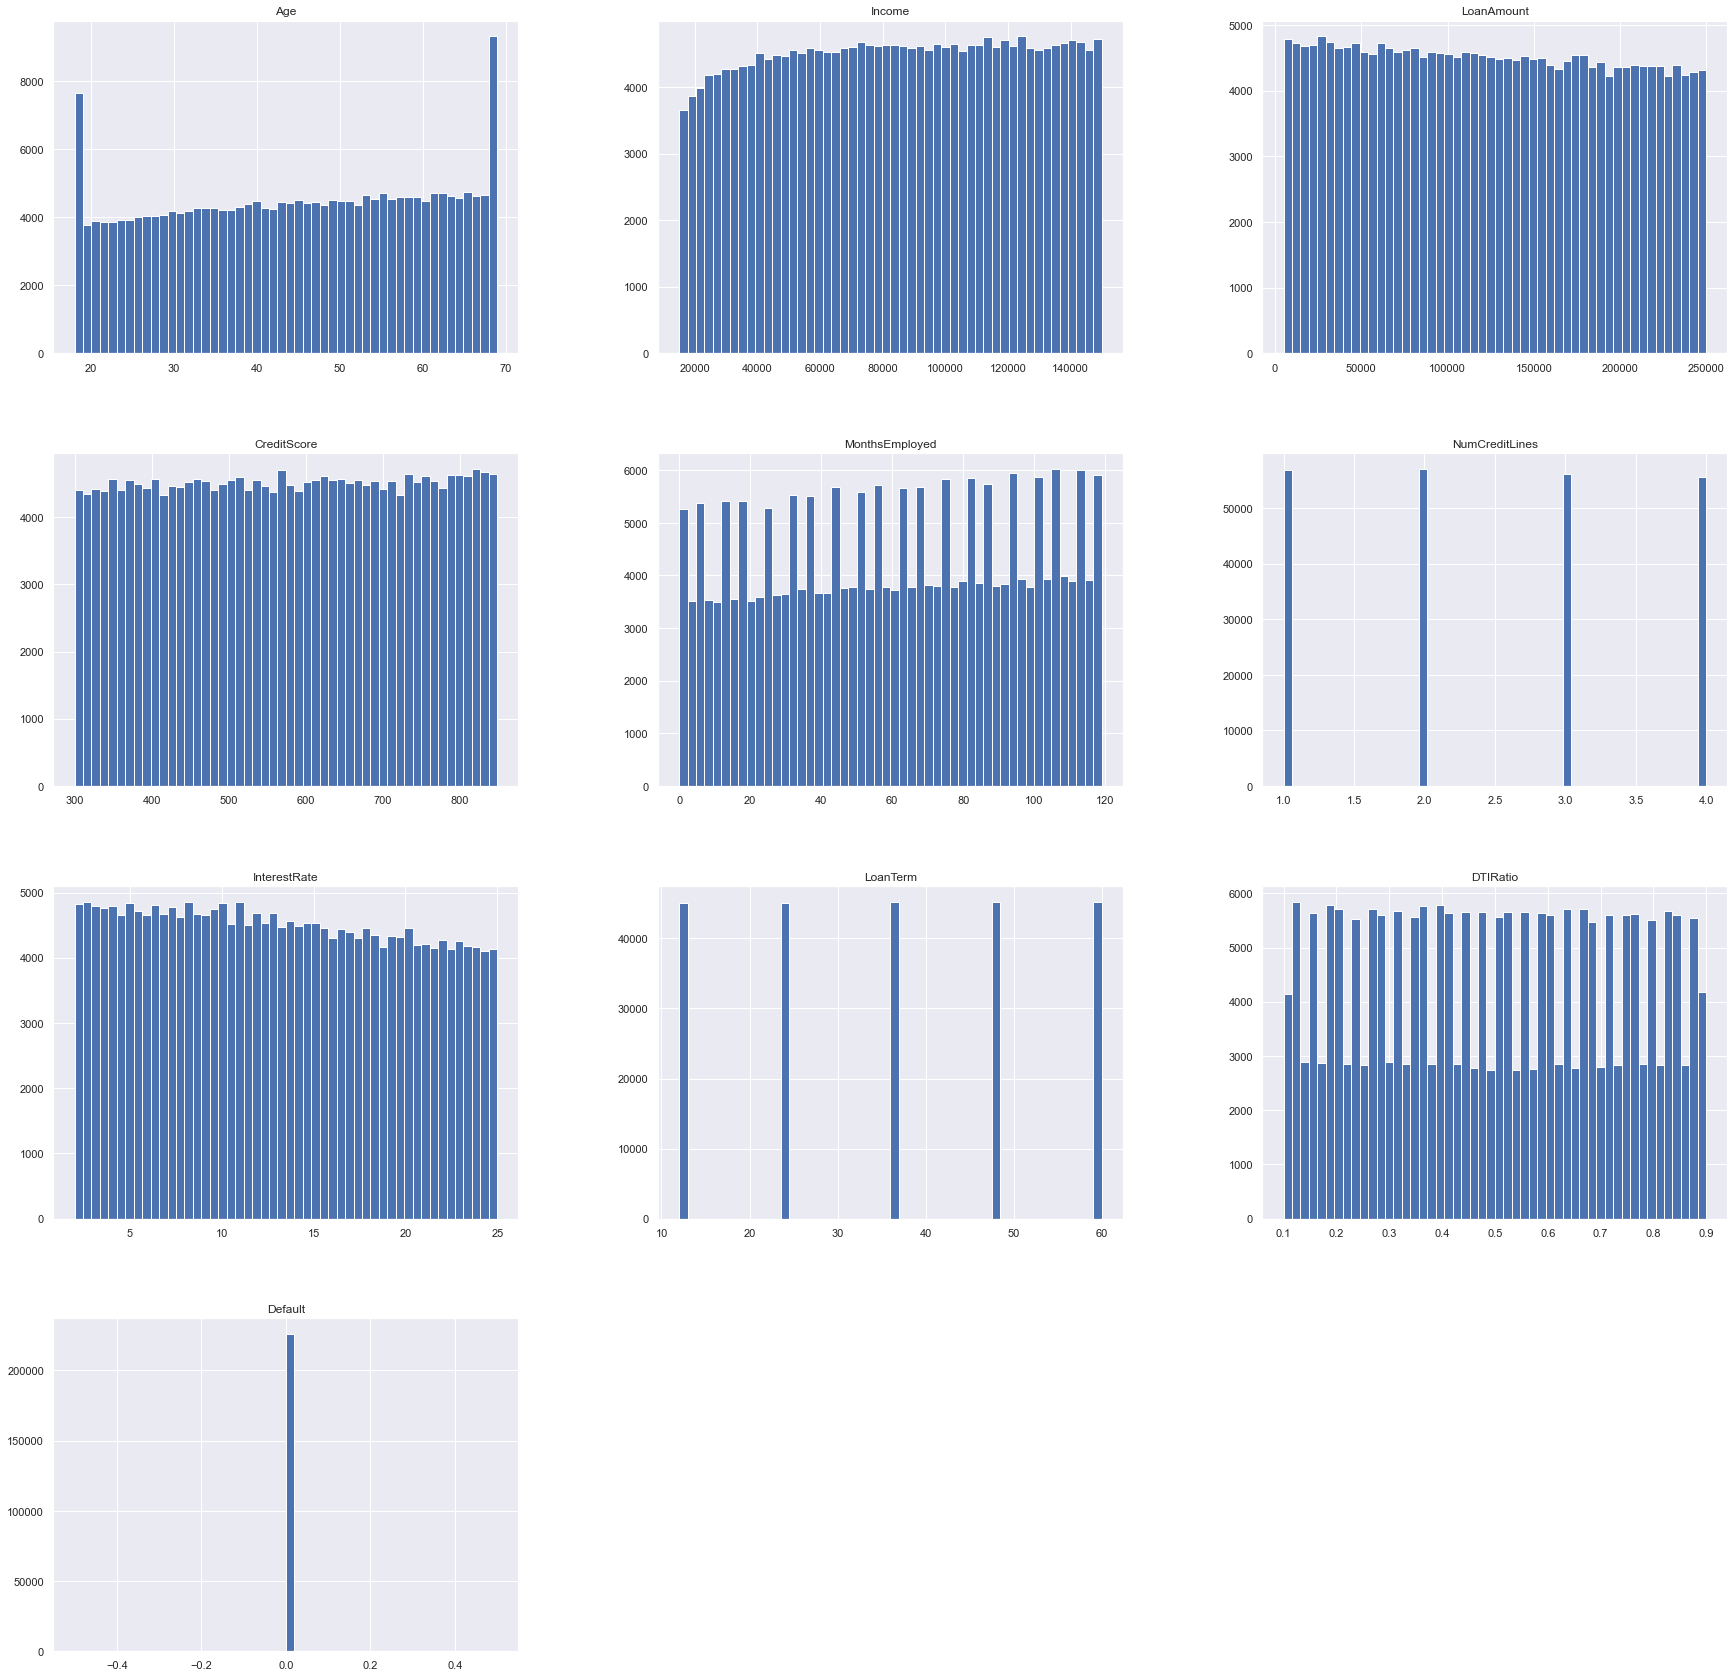

In [55]:
data[data['Default'] == 0].hist(bins=50, figsize=(30,30))

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  object  
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

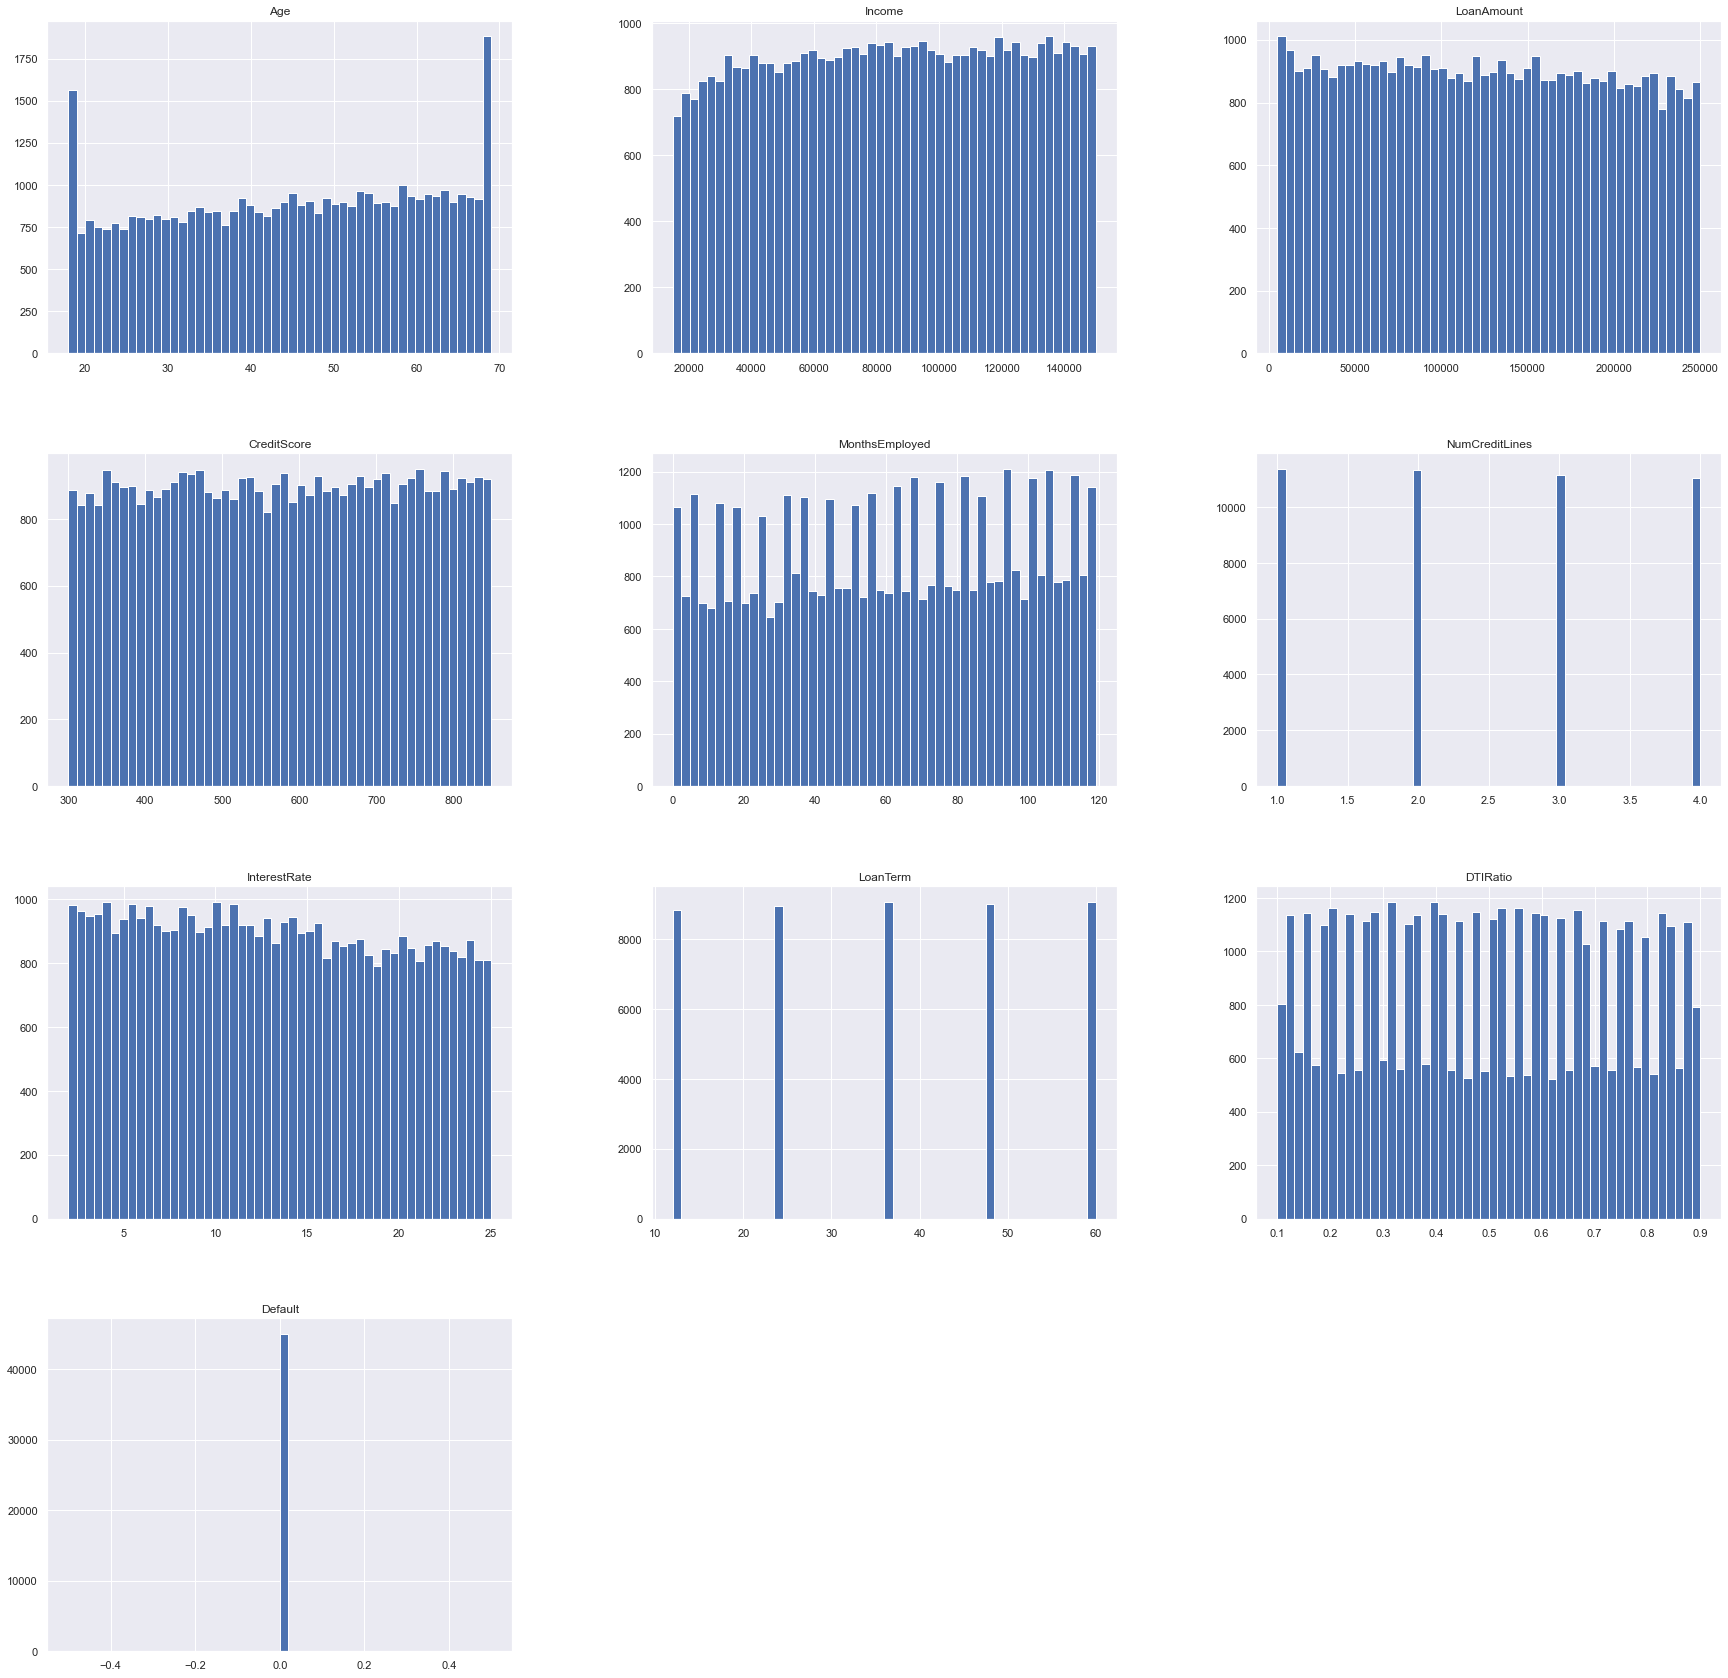

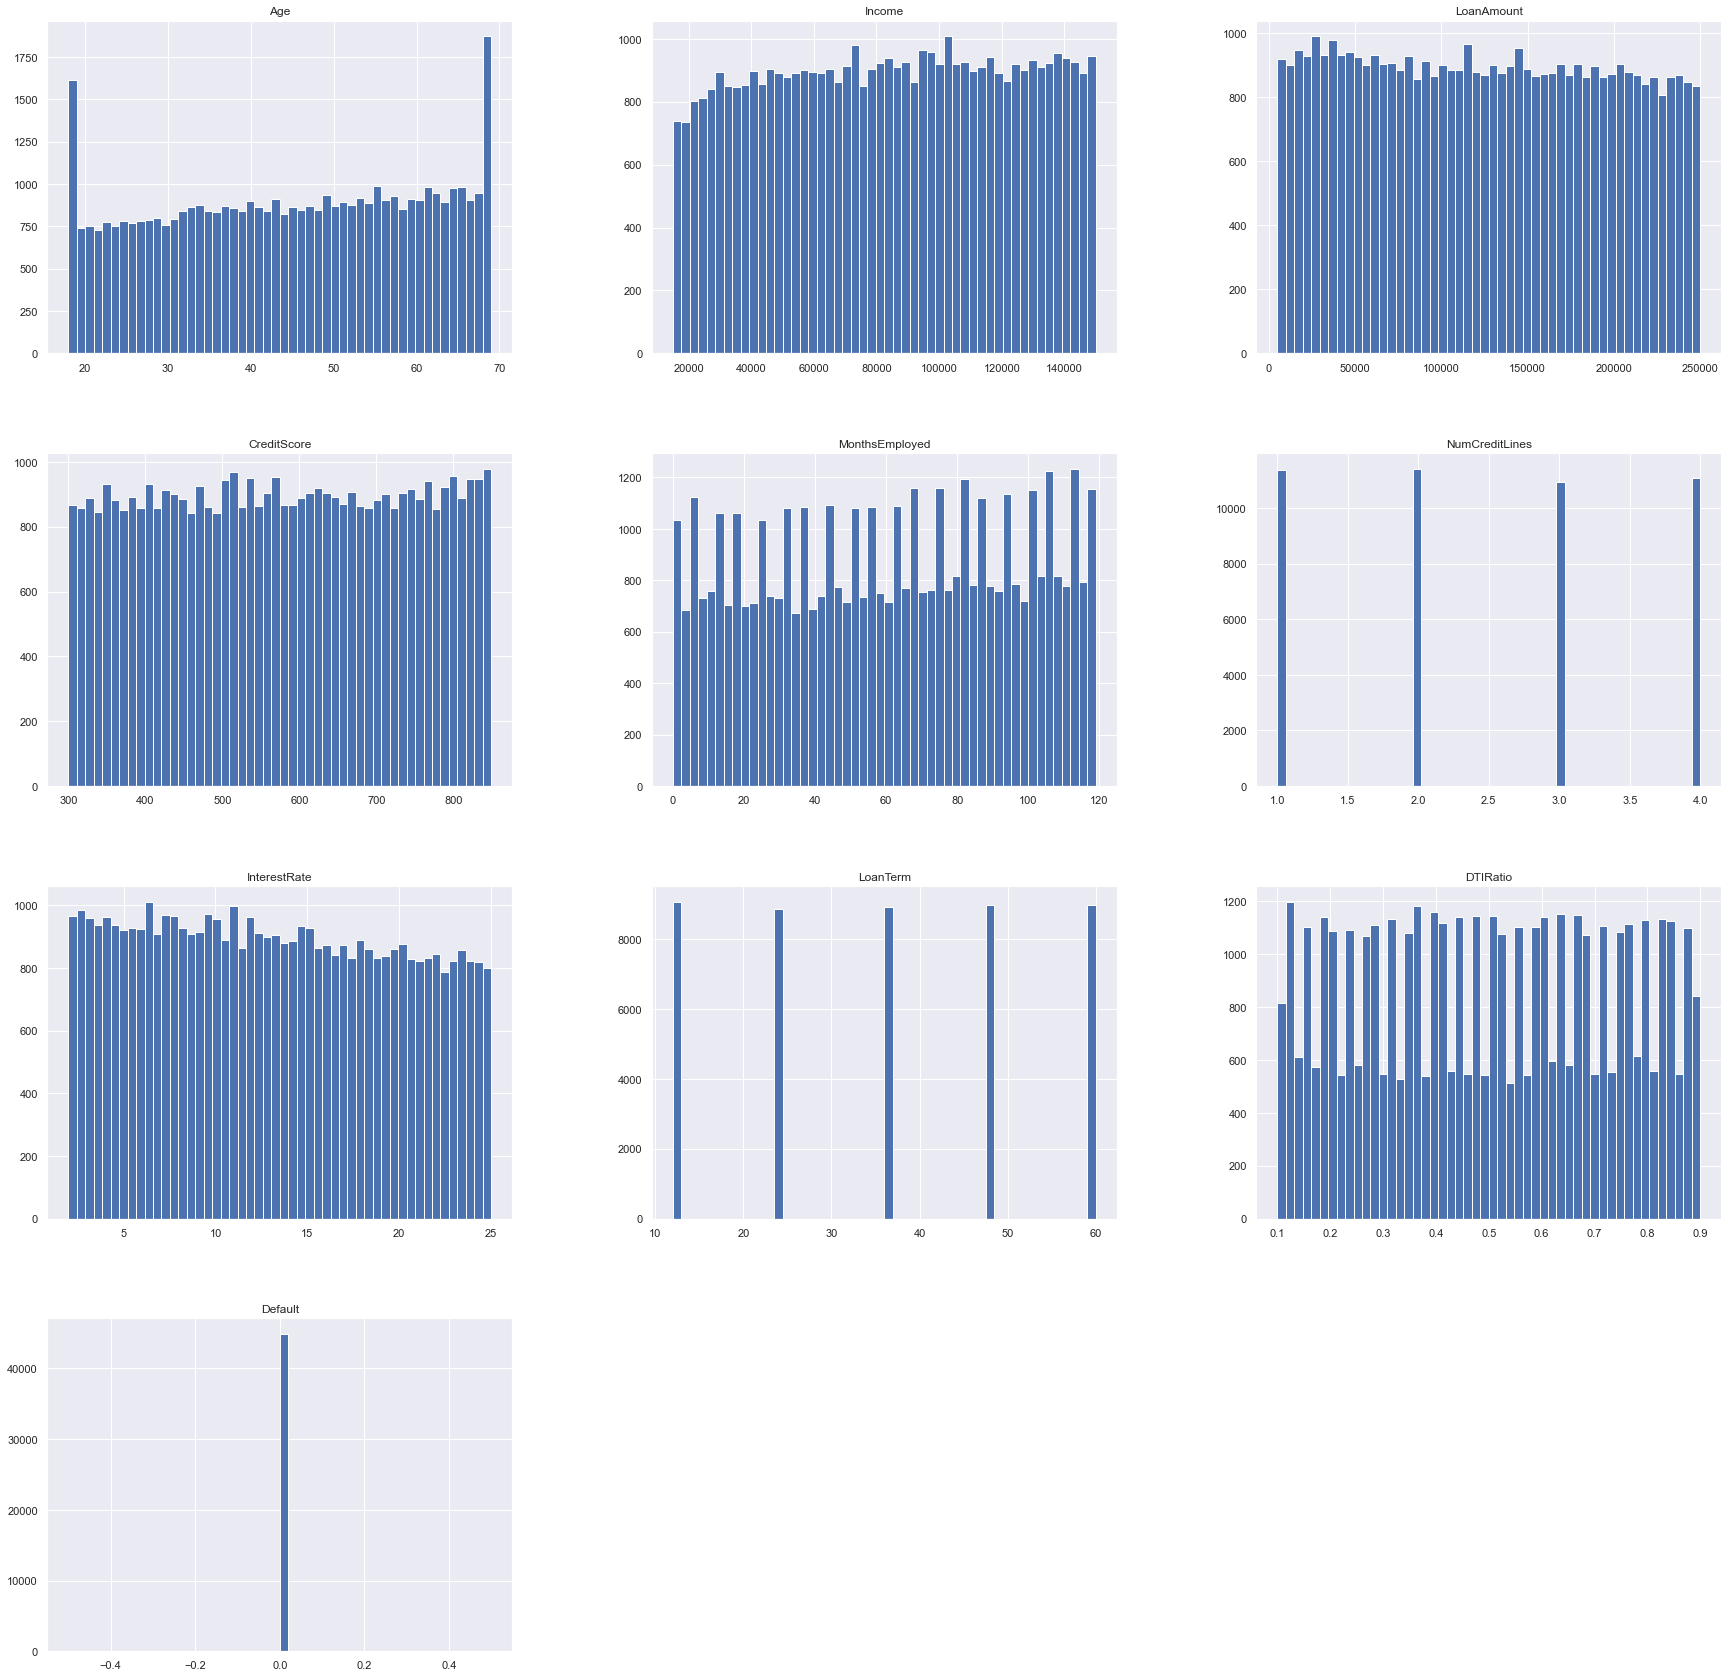

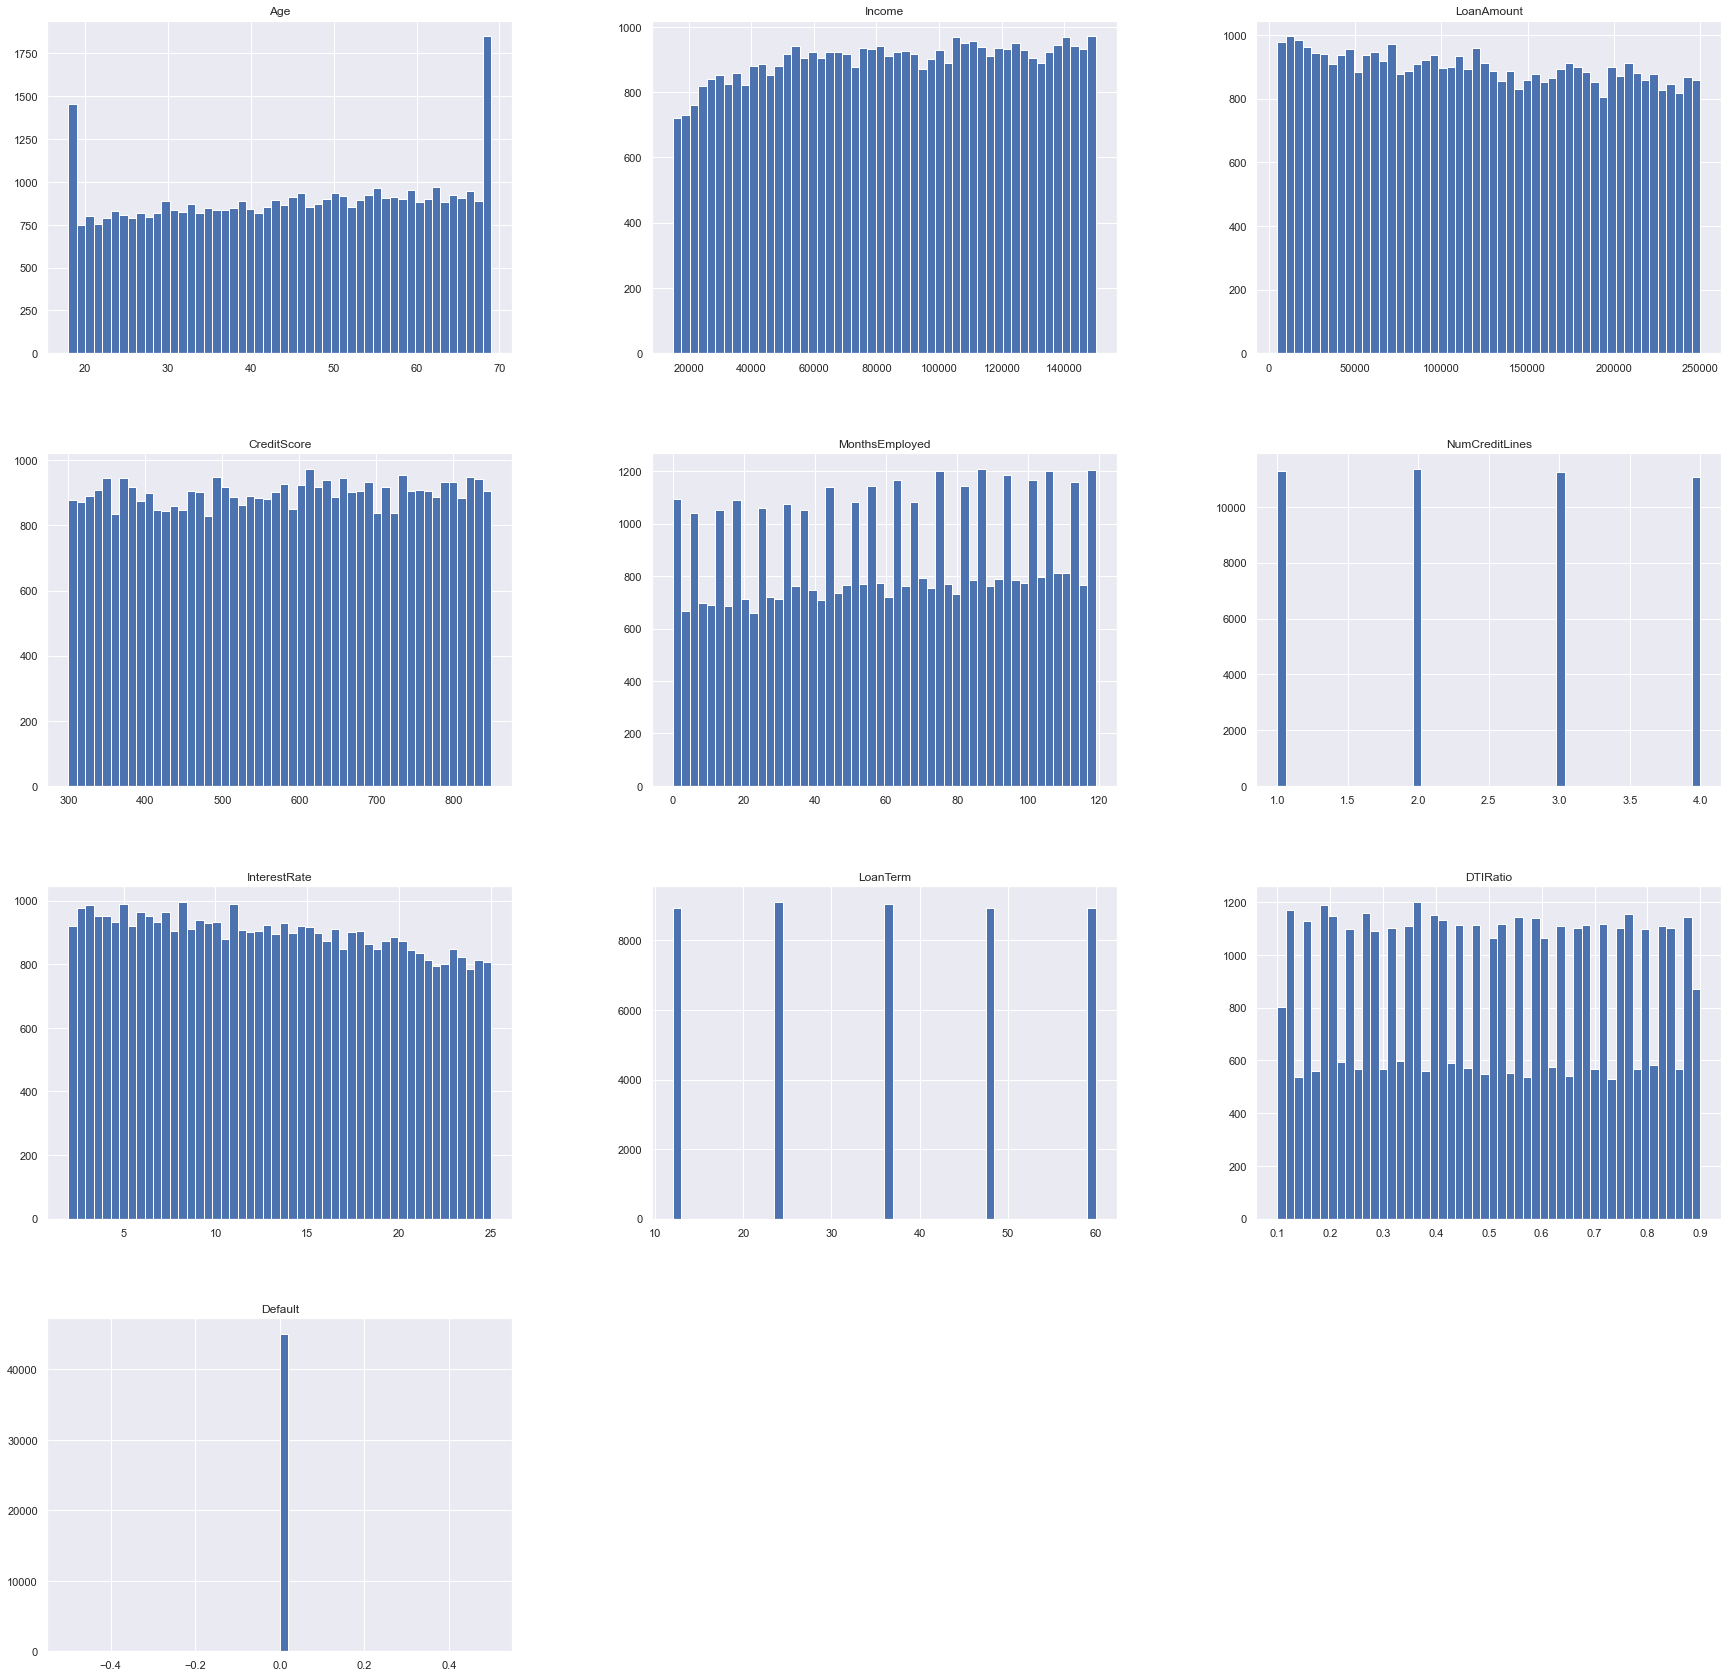

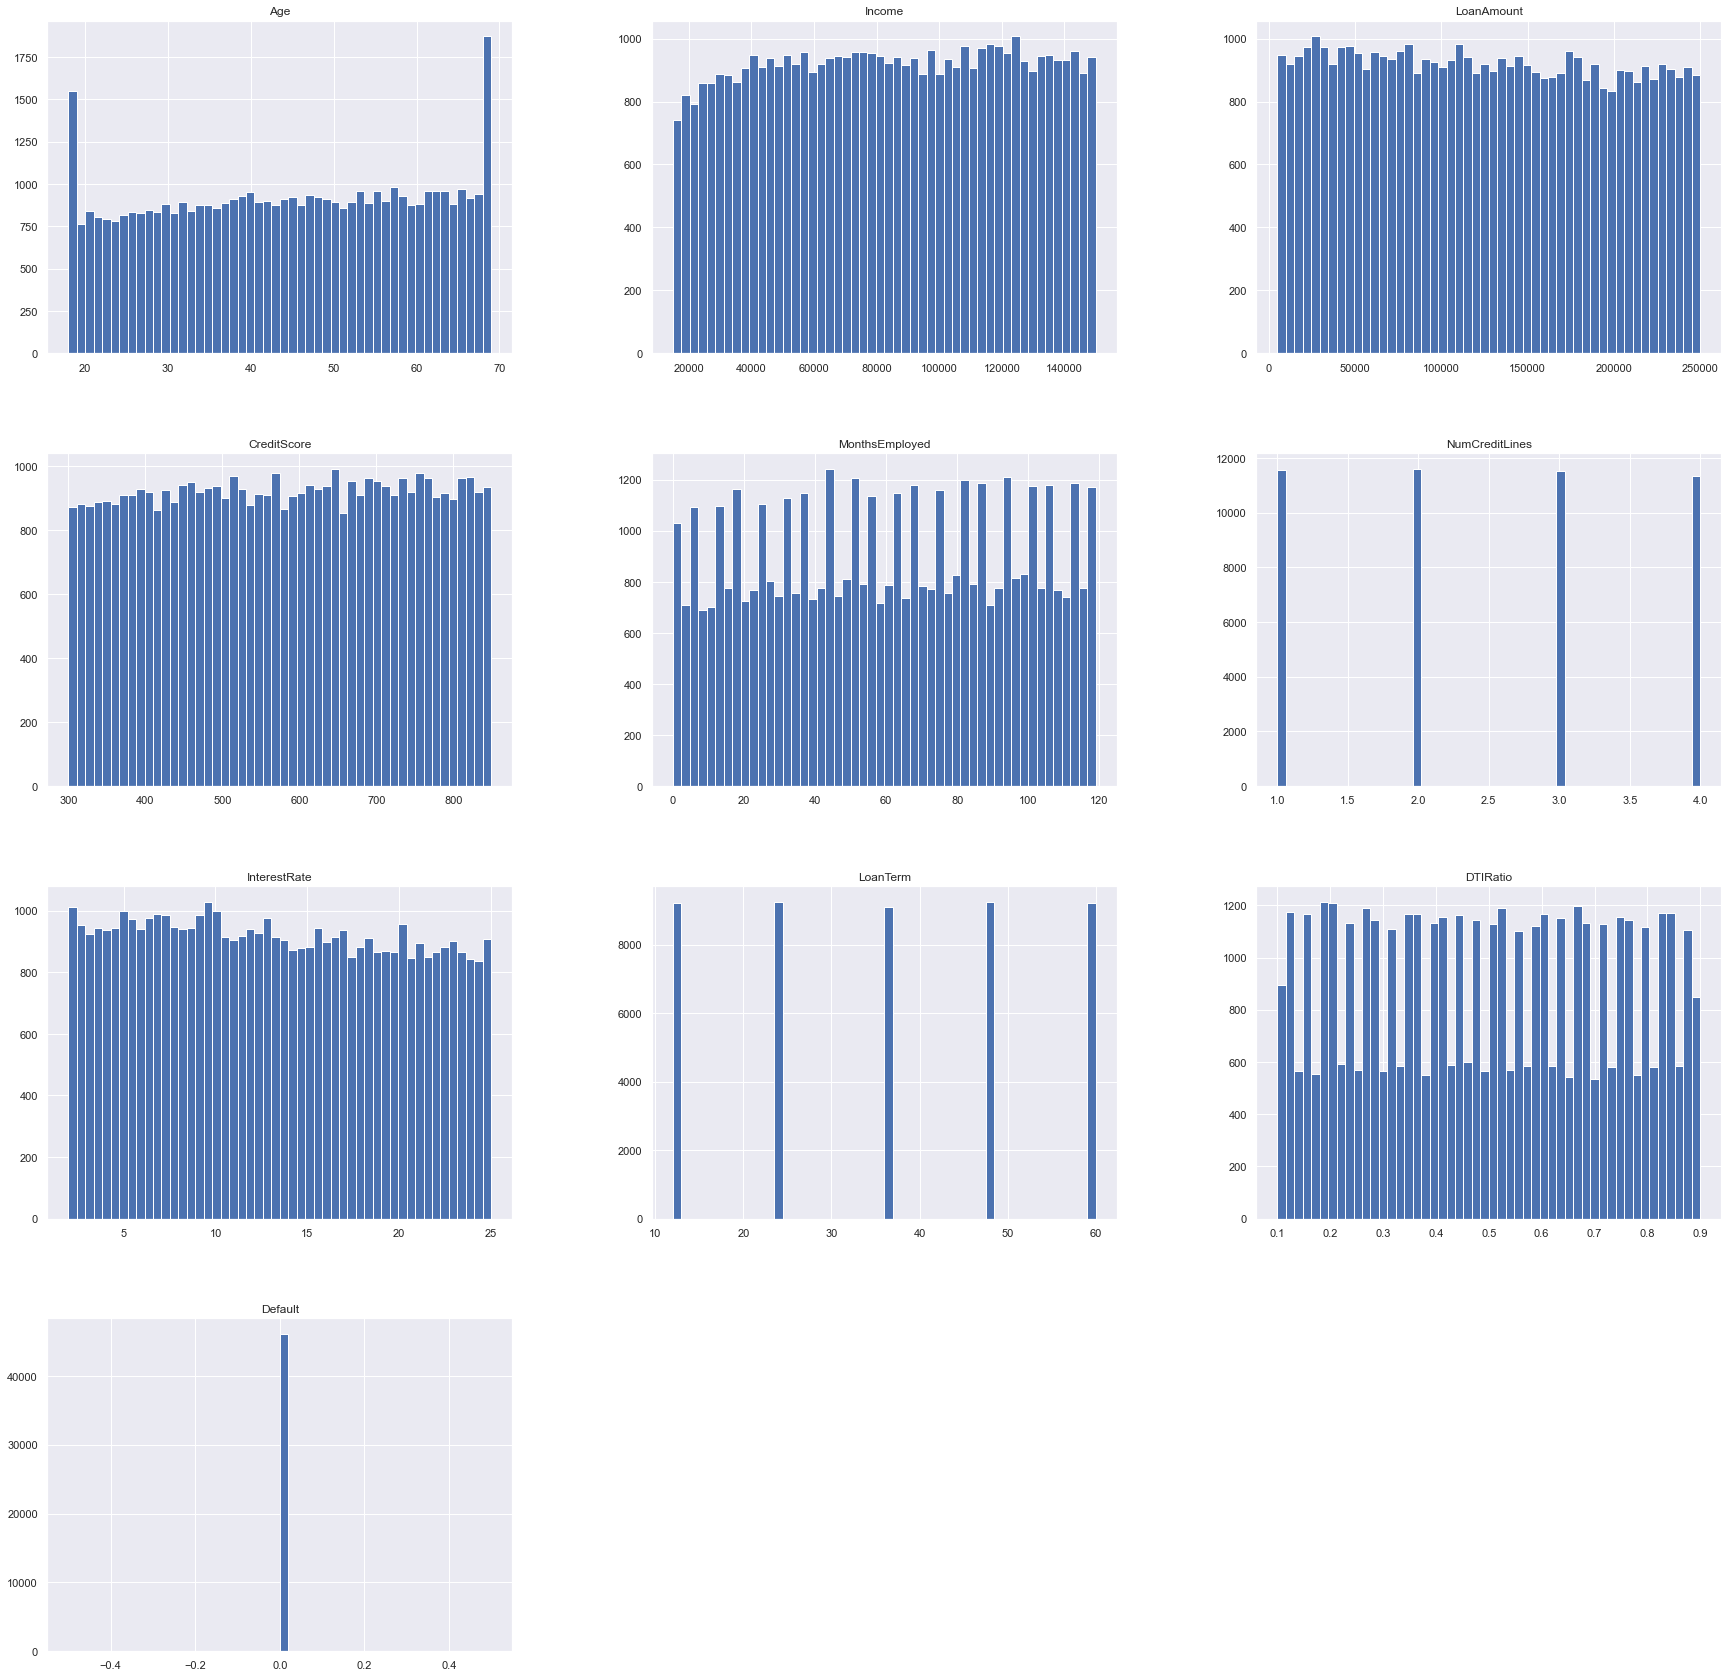

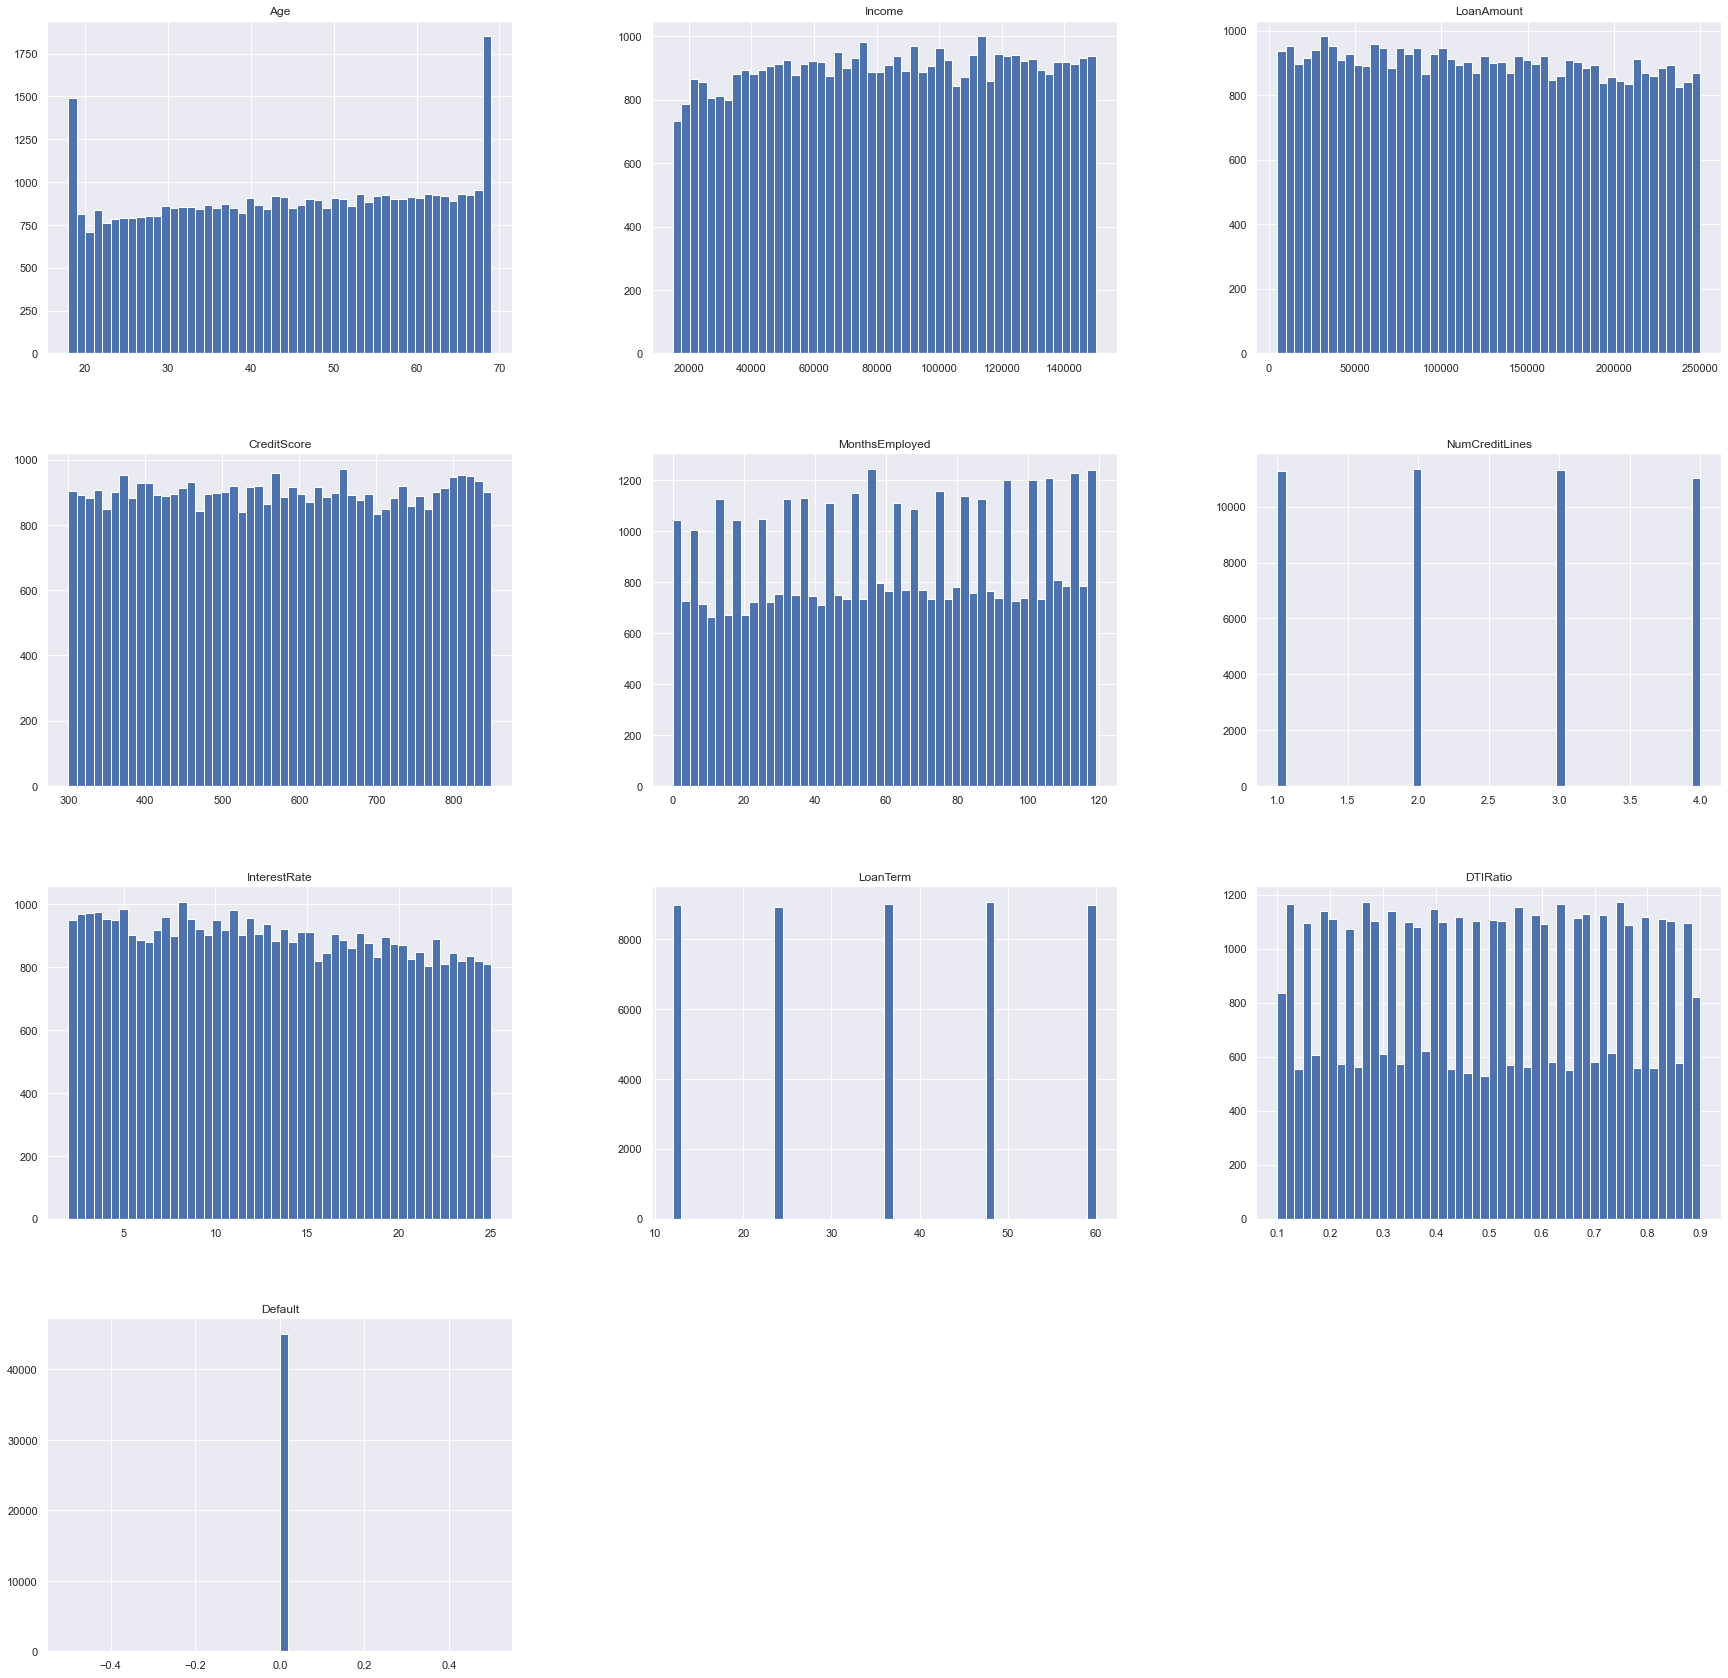

In [60]:
for cat in data["LoanPurpose"].unique():
    data[(data['Default'] == 0) & (data["LoanPurpose"] == cat)].hist(bins=50, figsize=(30,30))